<a href="https://colab.research.google.com/github/sicara/tf2-yolov4/blob/master/notebooks/YoloV4_Dectection_Example.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

YoloV4 Detection Example
===

What does this notebook ?
1. Install `tf2_yolov4` with pip.
2. Download weights from darknet YoloV4 trained on COCO and convert them to tensorflow weights.
3. Instanciate YoloV4 model, load COCO weights and run prediction on a single image.

## 1. Install `tf2_yolov4` + TensorFlow

In [1]:
!pip install --no-cache-dir https://github.com/sicara/tf2-yolov4/archive/master.zip
!pip install tensorflow==2.2.0

     - 1.3MB 2.0MB/s
     |████████████████████████████████| 1.1MB 412kB/s 
  Created wheel for tf2-yolov4: filename=tf2_yolov4-0.0.1-cp36-none-any.whl size=16692 sha256=77ae79ddb2ec371e2cc035dd086dd1a316bf2c9405c65b5190d523c83a7e7d49
  Stored in directory: /tmp/pip-ephem-wheel-cache-u_0p6wlp/wheels/dd/5a/79/53f47cadc4652a9a54ebe232fe724de8fdb8700e3a0c99bf9c
Successfully built tf2-yolov4
  Found existing installation: tensorflow-addons 0.8.3
    Uninstalling tensorflow-addons-0.8.3:
      Successfully uninstalled tensorflow-addons-0.8.3


## 2. Get COCO pretrained weights

First, download `yolov4.weights` from [AlexeyAB/darknet](https://github.com/AlexeyAB/darknet#how-to-evaluate-ap-of-yolov4-on-the-ms-coco-evaluation-server) repository.
The `yolov4.weights` file length should be `257717640`. If not, rerun the cell.

In [2]:
!wget --load-cookies /tmp/cookies.txt "https://docs.google.com/uc?export=download&confirm=$(wget --quiet --save-cookies /tmp/cookies.txt --keep-session-cookies --no-check-certificate 'https://docs.google.com/uc?export=download&id=1cewMfusmPjYWbrnuJRuKhPMwRe_b9PaT' -O- | sed -rn 's/.*confirm=([0-9A-Za-z_]+).*/\1\n/p')&id=1cewMfusmPjYWbrnuJRuKhPMwRe_b9PaT" -O yolov4.weights
!rm -rf /tmp/cookies.txt
!ls -la ./yolov4.weights

--2020-05-27 09:29:08--  https://docs.google.com/uc?export=download&confirm=EGki&id=1cewMfusmPjYWbrnuJRuKhPMwRe_b9PaT
Resolving docs.google.com (docs.google.com)... 173.194.216.100, 173.194.216.113, 173.194.216.101, ...
Connecting to docs.google.com (docs.google.com)|173.194.216.100|:443... connected.
HTTP request sent, awaiting response... 302 Moved Temporarily
Location: https://doc-08-28-docs.googleusercontent.com/docs/securesc/1ih3jfibinpmjjtca0kedmoag7phjcon/8gkgqpdd064unnaa9care8hgednj0jhm/1590571725000/14889149095783116612/18379189354752943752Z/1cewMfusmPjYWbrnuJRuKhPMwRe_b9PaT?e=download [following]
--2020-05-27 09:29:08--  https://doc-08-28-docs.googleusercontent.com/docs/securesc/1ih3jfibinpmjjtca0kedmoag7phjcon/8gkgqpdd064unnaa9care8hgednj0jhm/1590571725000/14889149095783116612/18379189354752943752Z/1cewMfusmPjYWbrnuJRuKhPMwRe_b9PaT?e=download
Resolving doc-08-28-docs.googleusercontent.com (doc-08-28-docs.googleusercontent.com)... 172.217.203.132, 2607:f8b0:400c:c07::84
Conne

`tf2_yolov4` provides a `convert-darknet-weights`, a script to convert a darknet weights file (*.weights) to a tensorflow weights file (*.h5):

In [3]:
!convert-darknet-weights yolov4.weights -o yolov4.h5
!ls -la ./yolov4.h5

2020-05-27 09:29:18.284049: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcudart.so.10.1
2020-05-27 09:29:20.145451: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcuda.so.1
2020-05-27 09:29:20.194347: E tensorflow/stream_executor/cuda/cuda_driver.cc:313] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
2020-05-27 09:29:20.194411: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (83aa5b8c9e0b): /proc/driver/nvidia/version does not exist
2020-05-27 09:29:20.217916: I tensorflow/core/platform/profile_utils/cpu_utils.cc:102] CPU Frequency: 2300000000 Hz
2020-05-27 09:29:20.218128: I tensorflow/compiler/xla/service/service.cc:168] XLA service 0x1a2abc0 initialized for platform Host (this does not guarantee that XLA will be used). Devices:
2020-05-27 09:29:20.218164: I tensorflow/com

## 3. Run a prediction

Import tensorflow, tf2_yolov4 model and anchors

In [0]:
import tensorflow as tf

from tf2_yolov4.anchors import YOLOV4_ANCHORS
from tf2_yolov4.model import YOLOv4

SIZE_X, SIZE_Y = (640, 960)

Download an image:

--2020-05-27 09:29:39--  https://github.com/sicara/tf2-yolov4/raw/master/notebooks/images/cars.jpg
Resolving github.com (github.com)... 140.82.112.4
Connecting to github.com (github.com)|140.82.112.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/sicara/tf2-yolov4/master/notebooks/images/cars.jpg [following]
--2020-05-27 09:29:39--  https://raw.githubusercontent.com/sicara/tf2-yolov4/master/notebooks/images/cars.jpg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 197210 (193K) [image/jpeg]
Saving to: ‘cars.jpg’

cars.jpg            100%[===================>] 192.59K  --.-KB/s    in 0.04s   

2020-05-27 09:29:39 (4.29 MB/s) - ‘cars.jpg’ saved [197210/197210]



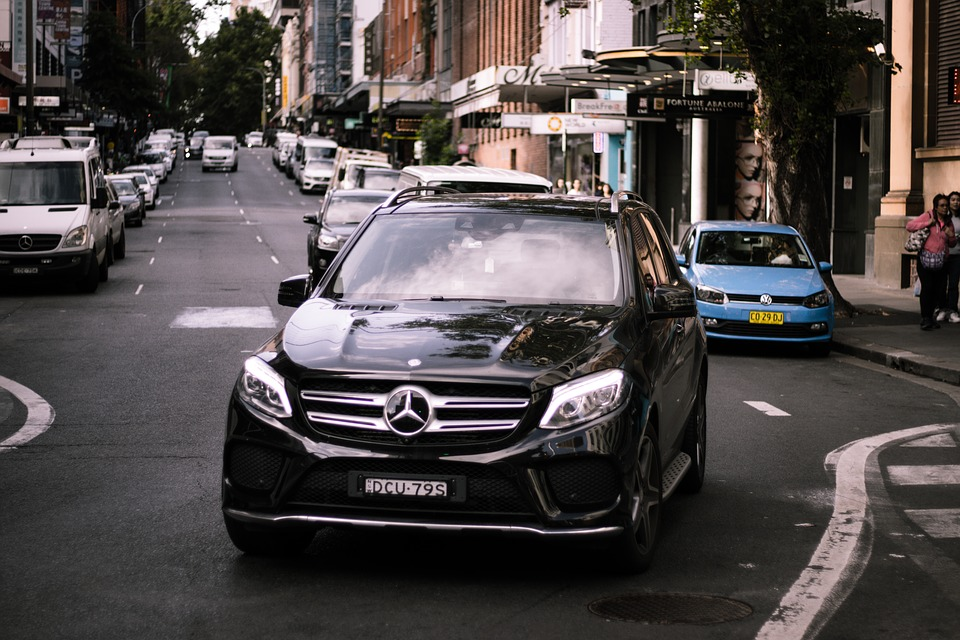

In [5]:
!wget https://github.com/sicara/tf2-yolov4/raw/master/notebooks/images/cars.jpg

from IPython.display import Image
Image('./cars.jpg')

Open and preprocess the image with TensorFlow:

In [0]:
image = tf.io.read_file("./cars.jpg")
image = tf.image.decode_image(image)
image = tf.expand_dims(image, axis=0)
image = tf.image.resize(image, (SIZE_X, SIZE_Y))
images = image / 255.0

Create YoloV4 model and load COCO weights:

In [7]:
model = YOLOv4(
    input_shape=(SIZE_X, SIZE_Y, 3),
    anchors=YOLOV4_ANCHORS,
    num_classes=80,
    training=False,
    yolo_max_boxes=100,
    yolo_iou_threshold=0.5,
    yolo_score_threshold=0.25,
)

model.load_weights("./yolov4.h5")
model.summary()

Model: "YOLOv4"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_8 (InputLayer)            [(None, 640, 960, 3) 0                                            
__________________________________________________________________________________________________
CSPDarknet53 (Model)            [(None, 20, 30, 1024 26652512    input_8[0][0]                    
__________________________________________________________________________________________________
YOLOv4_neck (Model)             [(None, 20, 30, 512) 15857152    CSPDarknet53[1][0]               
                                                                 CSPDarknet53[1][1]               
                                                                 CSPDarknet53[1][2]               
_____________________________________________________________________________________________

Predict:

In [0]:
predictions = model.predict(images)

Draw the output bounding boxes:

In [0]:
boxes_x1y1_x2y2 = predictions[0]
boxes_y1x1_y2x2 = boxes_x1y1_x2y2[:, :, [1, 0, 3, 2]]
bbox_image = tf.image.draw_bounding_boxes(images, boxes_y1x1_y2x2, colors=None)
bbox_image = tf.cast(bbox_image * 255, "uint8")

tf.io.write_file("cars-detection.jpg", tf.io.encode_jpeg(bbox_image[0, :, :, :]))

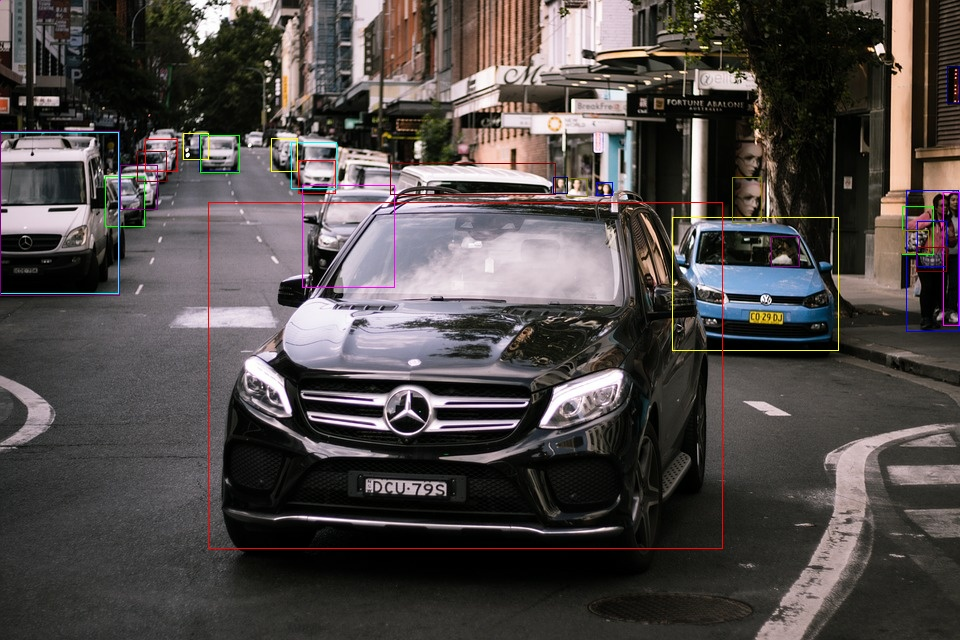

In [10]:
Image("./cars-detection.jpg")